# RelMinerR 
In natural language processing (NLP) and text mining, understanding the relationship between two terms can be crucial for tasks such as knowledge extraction, semantic analysis, and information retrieval. For example, you may want to evaluate how strongly two concepts (such as "Cancer" and "TP53") are related across a large corpus of documents by considering their synonyms. This relationship can be quantified by calculating co-occurrences, Pointwise Mutual Information (PMI), and Normalized Pointwise Mutual Information (NPMI). 


**RelMineR** is an R package designed to facilitate the discovery of potential biomedical relationships between terms using PMI and NPMI scores. 

**Key Features:**

* **Relationship Quantification:** Employs established metrics like co-occurrences, PMI, and NPMI to measure the strength of relationships between terms.
* **PubMed Abstraction:** Leverages a pre-built Elasticsearch index of PubMed abstracts to efficiently search for relevant information.
* **Biomedical Focus:** Tailored to the specific needs of biomedical research, ensuring accurate and meaningful relationship discovery.

**How it Works:**

1. **Elasticsearch Integration:** RelMineR seamlessly connects to a pre-configured Elasticsearch index containing PubMed abstracts.
3. **Relationship Quantification:** Calculates metrics such as PMI and NPMI to quantify the strength of these relationships.
4. **API Access:** Provides a user-friendly API that allows researchers to query the system for potential relationships between terms of interest.

**Note:** Detailed instructions for building the Elasticsearch index of PubMed abstracts will be available in a separate GitHub repository.

By utilizing RelMineR, researchers can gain valuable insights into the connections between biomedical concepts, accelerating their understanding of complex biological processes and facilitating the discovery of new knowledge.


# Background

## Pointwise Mutual Information (PMI)

PMI is a measure of the association between two terms based on their co-occurrence. It quantifies how much more likely two terms are to co-occur than would be expected by chance. PMI is used widely in the field of information theory and computational linguistics to quantify the strength of association between two terms. It was initially proposed by [Church and Hanks (1990)](https://aclanthology.org/J90-1003.pdf) as a way to measure word associations in corpora.

$$
\text{PMI}(A, B) = \log \frac{P(A, B)}{P(A) \cdot P(B)}
$$

Where:
- \( P(A, B) \) is the probability that both terms \(A\) and \(B\) occur together (co-occurrence).
- \( P(A) \) is the probability that term \(A\) occurs.
- \( P(B) \) is the probability that term \(B\) occurs.

## PMI in Terms of Document Counts

When working with document counts in a corpus, PMI can be expressed as:

$$
\text{PMI}(A, B) = \log \frac{\frac{n_{AB}}{N}}{\left(\frac{n_A}{N}\right) \cdot \left(\frac{n_B}{N}\right)}
$$

Where:
- \(n_{AB}\) is the number of documents where both \(A\) and \(B\) occur (co-occurrence).
- \(n_A\) is the number of documents where \(A\) occurs.
- \(n_B\) is the number of documents where \(B\) occurs.
- \(N\) is the total number of documents.

## Normalized Pointwise Mutual Information (nPMI)

nPMI is a normalized version of PMI that scales the values between -1 and 1. It is used to account for the fact that PMI tends to increase with rarer terms. It was first implemented by [Bouma (2009)](https://www.semanticscholar.org/paper/Normalized-(pointwise)-mutual-information-in-Bouma/15218d9c029cbb903ae7c729b2c644c24994c201). 


$$
\text{nPMI}(A, B) = \frac{\text{PMI}(A, B)}{-\log P(A, B)}
$$

Or in terms of document counts:

$$
\text{nPMI}(A, B) = \frac{\log \frac{P(A, B)}{P(A) \cdot P(B)}}{-\log P(A, B)}
$$

Where:
- \(P(A, B)\) is the probability of co-occurrence of \(A\) and \(B\), as defined above.

## Additional Notes:

- PMI is positive if the two terms co-occur more often than expected by chance, negative if they co-occur less often, and zero if they are independent.
- nPMI normalizes PMI and ranges from -1 to 1, where:
  - \(1\) indicates perfect co-occurrence (always occur together).
  - \(0\) indicates independence (no association).
  - \(-1\) indicates that the terms never co-occur.

These formulas are essential when analyzing the relationship between terms using co-occurrence data.

## Select application to biomedical research 

### Stress response pathways
[Chambers et al. (2024)](https://doi.org/10.1021/acs.chemrestox.3c00335.) have used the approach to find chemicals that induce adaptive stress response pathways (SRPs) by applying Pointwise Mutual Information (PMI) and Normalized Pointwise Mutual Information (NPMI), as described in Chambers et al. (2024). SRPs are essential for restoring cellular homeostasis following perturbation, and when disrupted beyond critical thresholds, they can lead to apoptosis, autophagy, or cellular senescence. These pathways are key indicators for therapeutic interventions and biomarkers of toxicity.

## References

[Church, Kenneth, and Patrick Hanks. “Word Association Norms, Mutual Information, and Lexicography.” Computational Linguistics 16, no. 1 (1990): 22–29.](https://aclanthology.org/J90-1003.pdf)

[Bouma, Gerlof. “Normalized (Pointwise) Mutual Information in Collocation Extraction.” Proceedings of GSCL 30 (2009): 31–40.](https://www.semanticscholar.org/paper/Normalized-(pointwise)-mutual-information-in-Bouma/15218d9c029cbb903ae7c729b2c644c24994c201)

[Chambers, Bryant A., Danilo Basili, Laura Word, Nancy Baker, Alistair Middleton, Richard S. Judson, and Imran Shah. “Searching for LINCS to Stress: Using Text Mining to Automate Reference Chemical Curation.” Chemical Research in Toxicology 37, no. 6 (June 17, 2024): 878–93.](https://doi.org/10.1021/acs.chemrestox.3c00335.)




# Use-cases

## Relationship between any two terms 

You want to evaluate how strongly two concepts (such as "Cancer" and "TP53") are related across a large corpus of documents. 

1. Create an list to store relevant information to connect to the ElasticSearch server running on localhost at port 9200. 


In [3]:
RM0 <- create_relminer(host='localhost',port = 9200,index='pubmed')


2. Use the `count_occurrence` function to count the number of abstracts with Cancer or TP53

In [7]:
count_occurrences(terms = c('Cancer'),relminer = RM0)

[1] 1522097

In [8]:
count_occurrences(terms = c('TP53'),relminer = RM0)

[1] 16073

3. Use the `count_cooccurrence` function to count the number of abstracts with Cancer and TP53

In [9]:
count_cooccurrences(terms_A = c('Cancer'),terms_B=c('TP53'),relminer = RM0)

[1] 8884

4. Use the `count_cooccurrence` function to count the number of abstracts with Cancer and TP53 as well as their potential synonyms

In [12]:
count_cooccurrences(terms_A = c('Cancer','neoplasia','neoplasm'),terms_B=c('TP53','P53'),relminer = RM0)

[1] 44707

Using synonyms in information retrieval or text mining helps you get more hits because different terms or expressions can refer to the same concept. In scientific literature, common names, abbreviations, or alternate descriptions are frequently used to refer to the same entity, such as genes, chemicals, or diseases. By incorporating synonyms, you broaden the scope of the search and increase the likelihood of matching relevant documents.

5. Calculate the PMI and NPMI using the `find_rels` function, which require the terms to be structured as named list

In [24]:
gene <- create_term('p53',c('P53','TP53'),'gene')
disease <- create_term('Cancer',c('Cancer','neoplasia','neoplasm'),'disease')

find_rel(gene,disease,relminer = RM0)

term_a,term_b,class_a,class_b,count_a,count_b,count_ab,count_docs,pmi,npmi
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
p53,Cancer,gene,disease,95237,1572923,44707,20688473,2.626286,0.2966177



### Explanation of the find_rels output:-

This represents the **co-occurrence analysis** between two terms, in this case **p53** and **Cancer**, across a PubMed abstracts documents. The columns in the `data.frame` contain various statistics about the terms' individual occurrences, their joint occurrences, and measures of their association based on co-occurrence analysis.

#### Column Descriptions:
- **`term_a`**: The first term in the analysis **p53**
  
- **`term_b`**: The second term in the analysis **Cancer**

- **`class_a`**: The category or class to which `term_a` belongs. Here, `p53` is defined (by the user) as a **gene**.

- **`class_b`**: The category or class to which `term_b` belongs. Here, `Cancer` is classified as a **disease**.

- **`count_a`**: The total number of documents in the corpus where `term_a` (p53) occurs. In this case, **95,237** documents mention p53.

- **`count_b`**: The total number of documents in the corpus where `term_b` (Cancer) occurs. In this case, **1,572,923** documents mention Cancer.

- **`count_ab`**: The total number of documents where both `term_a` (p53) and `term_b` (Cancer) co-occur together. In this case, **44,707** documents mention both p53 and Cancer.
- **`count_docs`**: The total number of abstracts in the index

- **`pmi`**: The **Pointwise Mutual Information (PMI)** score, which measures the strength of association between `term_a` and `term_b` based on their co-occurrence. A higher PMI score indicates that the two terms co-occur more often than would be expected by chance. In this case, the PMI score of **2.626286** suggests that p53 and Cancer co-occur more frequently than random chance would suggest.

- **`npmi`**: The **Normalized Pointwise Mutual Information (NPMI)** score, which normalizes the PMI score to a value between -1 and 1. An NPMI value closer to **1** indicates a strong positive association (the terms frequently co-occur), **0** indicates independence (the terms occur together at random), and **-1** indicates a strong negative association (the terms never co-occur). In this case, the NPMI score of **0.2966177** suggests a moderate positive association between p53 and Cancer.

### Interpretation:
- The data suggests that **p53** (a gene) and **Cancer** (a disease) co-occur in **44,707** documents out of a corpus, with **95,237** documents mentioning p53 and **1,572,923** mentioning Cancer.
- The **PMI score of 2.63** indicates that p53 and Cancer co-occur more frequently than expected by chance.
- The **NPMI score of 0.30** suggests a moderate association between the two terms, meaning that p53 is frequently mentioned in the context of Cancer in the documents analyzed.

This suggests a potential relationship between the gene **p53** and **Cancer**, providing insights into how often they co-occur and how strongly they are associated in the analyzed corpus of documents. 


## Relationships between chemicals and diseases

This second use case aims to uncover relationships between thousands of chemicals and hundreds of diseases by leveraging co-occurrence analysis and statistical association measures PMI and NPMI. This task is a littler more involved due to the scale of the input terms.



1. Load chemicals and store them in a list

In [5]:
Chems <- read.csv("../data/chem.tsv",sep='\t',quote="\"")
#save(Chems, file = "../data/chems.rda")

In [6]:
Chems[sample(1:nrow(Chems),1),]

name                         class   
39 Chlorpromazine hydrochloride chemical
   synonyms                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [7]:
create_entity_from_row <- function(row) {
  list(
    name = row["name"],
    class = row["class"],
    synonyms = strsplit(row["synonyms"], "\\|")[[1]]  # Split synonyms by '|'
  )
}


In [8]:
chem_ents <- apply(Chems, 1, create_entity_from_row)

2. Load diseases

In [9]:
Diseases <- read.csv("../data/disease.tsv",sep='\t',quote="\"")

In [10]:
Diseases

name,class,synonyms,Synonyms
<chr>,<chr>,<chr>,<chr>
Parkinson's Disease,disease,Parkinson|Parkinson's Disease|Shaking Palsy|Paralysis Agitans|Substantia Nigra Degeneration,"['Shaking Palsy', 'Paralysis Agitans', 'Substantia Nigra Degeneration']"
Alzheimer's Disease,disease,Alzheimer's Disease|Senile Dementia|Alzheimer's Dementia|Memory Loss,"['Senile Dementia', ""Alzheimer's Dementia"", 'Memory Loss']"
Multiple Sclerosis,disease,Multiple Sclerosis|MS|Disseminated Sclerosis|Multiple Sclerosis,"['MS', 'Disseminated Sclerosis', 'Multiple Sclerosis']"
Diabetes,disease,Diabetes|Diabetes Mellitus|Sugar Diabetes|Hyperglycemia,"['Diabetes Mellitus', 'Sugar Diabetes', 'Hyperglycemia']"
Heart Disease,disease,Heart Disease|Coronary Artery Disease|Cardiovascular Disease|Heart Attack,"['Coronary Artery Disease', 'Cardiovascular Disease', 'Heart Attack']"


In [11]:
dis_ents <- apply(Diseases, 1, create_entity_from_row)

3. Count all cooccurrences

In [47]:
R1 <- find_rels(chem_ents[20:30],dis_ents,RM0)

In [56]:
head(R1)

,term_a,term_b,class_a,class_b,count_a,count_b,count_ab,count_docs,pmi,npmi
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
name,Ethylene thiourea,Parkinson's Disease,chemical,disease,277,92166,1,20688473,-0.3033654,-0.01248298
name1,Cyfluthrin,Parkinson's Disease,chemical,disease,611,92166,0,20688473,0.0000000,0.00000000
name2,Tretinoin,Parkinson's Disease,chemical,disease,23805,92166,126,20688473,0.2486797,0.01435377
name3,Diethylstilbestrol,Parkinson's Disease,chemical,disease,2295,92166,3,20688473,-1.7689391,-0.07786728
name4,Dieldrin,Parkinson's Disease,chemical,disease,1364,92166,49,20688473,3.0114587,0.16114731
name5,Flubendiamide,Parkinson's Disease,chemical,disease,174,92166,0,20688473,0.0000000,0.00000000


4. Visualize the distribution of hits by disease

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_bar()`).”


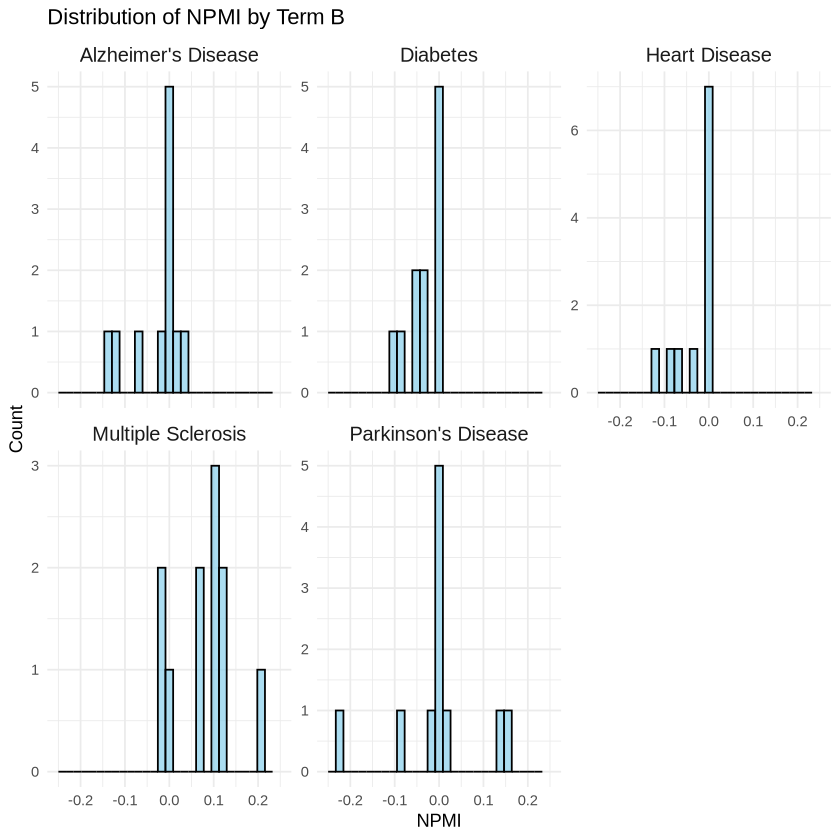

In [53]:
library(ggplot2)

# Assuming your data.frame is named df, which contains the columns as described

# Create the ggplot with fixed number of bins and x-axis range from -1 to 1
ggplot(R1, aes(x = npmi)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +  # 30 bins, adjust as needed
  facet_wrap(~ term_b, scales = "free_y") +  # Facet by term_b, free y-axis scaling
  scale_x_continuous(limits = c(-0.25, 0.25)) +  # Set x-axis range from -1 to 1
  labs(title = "Distribution of NPMI by Term B",
       x = "NPMI",
       y = "Count") +
  theme_minimal() +
  theme(strip.text = element_text(size = 12))  # Customize facet label size


5. Pick the top hits for each disease

In [58]:
subset(R1,npmi>0.1)

,term_a,term_b,class_a,class_b,count_a,count_b,count_ab,count_docs,pmi,npmi
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
name4,Dieldrin,Parkinson's Disease,chemical,disease,1364,92166,49,20688473,3.011459,0.1611473
name10,Buspirone,Parkinson's Disease,chemical,disease,1199,92166,32,20688473,2.582761,0.1338057
name22,Ethylene thiourea,Multiple Sclerosis,chemical,disease,277,352860,27,20688473,2.514733,0.1286477
name23,Cyfluthrin,Multiple Sclerosis,chemical,disease,611,352860,54,20688473,2.373446,0.1279663
name26,Dieldrin,Multiple Sclerosis,chemical,disease,1364,352860,92,20688473,1.983521,0.1115669
name27,Flubendiamide,Multiple Sclerosis,chemical,disease,174,352860,13,20688473,2.131084,0.1034412
name29,Chlordecone,Multiple Sclerosis,chemical,disease,224,352860,17,20688473,2.153695,0.1065402
name31,Picoxystrobin,Multiple Sclerosis,chemical,disease,59,352860,19,20688473,4.238872,0.2113687


6. Interpretation
There is evidence linking **dieldrin** and **buspirone** to Parkinson's disease, although the relationships are different in nature.

**Dieldrin and Parkinson's Disease**:
   Dieldrin is a pesticide that has been studied for its neurotoxic effects, particularly in relation to Parkinson's disease (PD). [Research](https://academic.oup.com/toxsci/article/196/1/99/7247543) shows that exposure to dieldrin can contribute to the degeneration of dopaminergic neurons, which is a hallmark of Parkinson's disease. Animal studies have demonstrated that dieldrin exposure increases the release of dopamine and can induce neurodegeneration, potentially triggering or exacerbating Parkinsonian symptoms.


 **Buspirone and Parkinson's Disease**:
   Buspirone is an anti-anxiety medication often prescribed for generalized anxiety disorder. It has been tested in clinical trials to assess its effectiveness in treating anxiety in Parkinson’s patients. Although buspirone has shown some efficacy in reducing anxiety in individuals with Parkinson's, its tolerability is a concern. [In a Phase II trial, 53% of patients experienced worsening motor symptoms while on buspirone, and a significant portion of patients discontinued the medication due to side effects](https://www.sciencedirect.com/science/article/abs/pii/S1353802020308117#!).
